In [1]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt

In [2]:
rng = np.random.default_rng()

## Pinwheel

In [3]:
def generate_pinwheel(*, num: int, rng: np.random.Generator) -> np.ndarray:
    # https://github.com/Formulator/Spiral/blob/master/PyTorch_Spiral_DataLoader.ipynb
    D = 2 # dimensionality
    K = 3 # number of classes
    N = num // K  # note: we will not generate exactly num datapoints unless K divides num
    X = np.zeros((N*K,D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + rng.standard_normal(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    return X

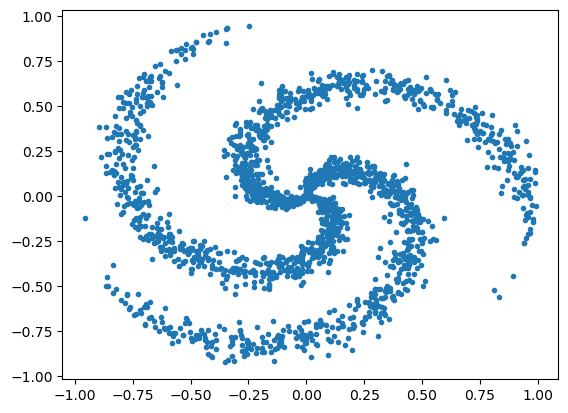

In [10]:
X = generate_pinwheel(num=2000, rng=rng)
plt.plot(X[:, 0], X[:, 1], '.')

## Spiral

In [4]:
def generate_spiral(*, num: int, rng: np.random.Generator) -> np.ndarray:
    thetas = rng.uniform(low=0.0, high=6*np.pi, size=(num,))
    rs = thetas * 0.05
    X = np.hstack((
        (rs * np.cos(thetas))[:, None],
        (rs * np.sin(thetas))[:, None],
    ))
    X = X + 0.04 * rng.standard_normal(X.shape) 
    return X

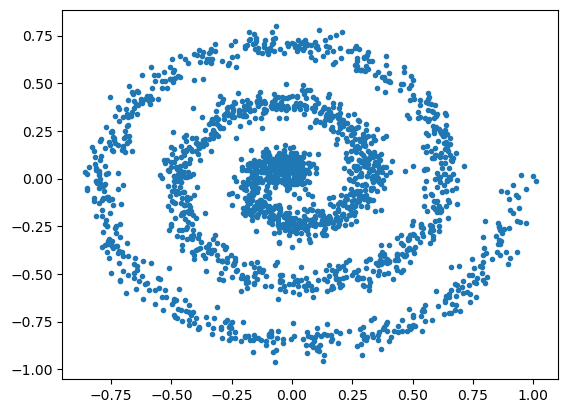

In [6]:
X = generate_spiral(num=2000, rng=rng)
plt.plot(X[:, 0], X[:, 1], '.')

## Checkerboard

In [5]:
def generate_checkerboard(*, num: int, rng: np.random.Generator) -> np.ndarray:
    # https://github.com/malbergo/stochastic-interpolants/blob/main/notebooks/checker-mirror.ipynb
    x1 = rng.uniform(size=num) * 4 - 2
    x2_ = rng.uniform(size=num) - rng.choice([0, 1], size=(num,)) * 2
    x2 = x2_ + (np.floor(x1) % 2)
    x = np.hstack([x1[:, None], x2[:, None]]) * 2
    return x

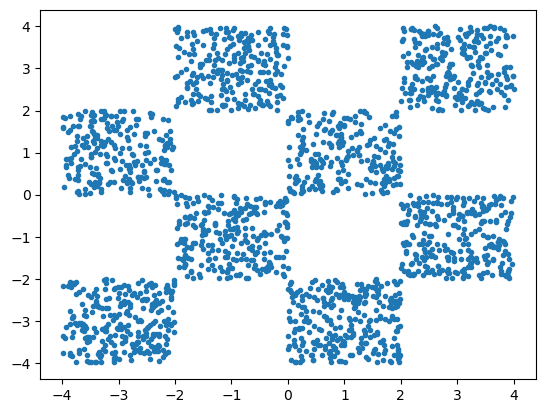

In [8]:
X = generate_checkerboard(num=2000, rng=rng)
plt.plot(X[:, 0], X[:, 1], '.')

## Gaussian mixtures

In [6]:
def generate_gaussian_mixtures(*, num: int, rng: np.random.Generator) -> np.ndarray:
    angles = np.linspace(0, 2*np.pi, 8)[:-1]
    idxs = rng.choice(np.arange(len(angles)), size=num)
    X = np.hstack((
        1.2*np.cos(angles[idxs])[:, None],
        1.2*np.sin(angles[idxs])[:, None]
    ))
    X = X + rng.standard_normal(size=X.shape) * 0.12
    return X

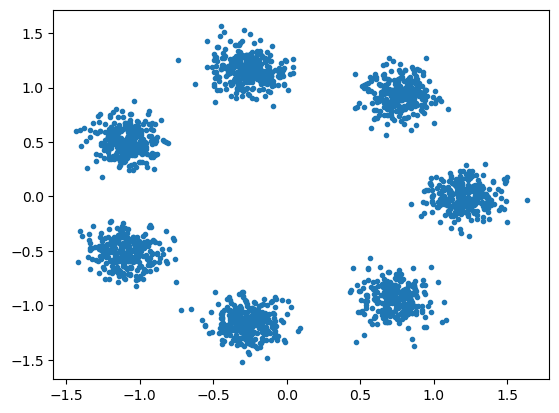

In [10]:
X = generate_gaussian_mixtures(num=2000, rng=rng)
plt.plot(X[:, 0], X[:, 1], '.')

In [11]:
np.save("generate_gaussian_mixtures.npy",generate_gaussian_mixtures(num=1000, rng=rng))

In [10]:
np.save("generate_checkerboard.npy",generate_checkerboard(num=1000, rng=rng))

In [9]:
np.save("generate_spiral.npy",generate_spiral(num=1000, rng=rng))

In [12]:
np.save("generate_pinwheel.npy",generate_pinwheel(num=1000, rng=rng))